In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/menwomen-classification/testdata/testdata/men/00000399.jpg
/kaggle/input/menwomen-classification/testdata/testdata/men/00000390.jpg
/kaggle/input/menwomen-classification/testdata/testdata/men/07 (4).jpg
/kaggle/input/menwomen-classification/testdata/testdata/men/00000030.jpg
/kaggle/input/menwomen-classification/testdata/testdata/men/00000042.jpg
/kaggle/input/menwomen-classification/testdata/testdata/men/00000127.jpg
/kaggle/input/menwomen-classification/testdata/testdata/men/00000113.jpg
/kaggle/input/menwomen-classification/testdata/testdata/men/00000335.jpg
/kaggle/input/menwomen-classification/testdata/testdata/men/00000459.jpg
/kaggle/input/menwomen-classification/testdata/testdata/men/00000115.jpg
/kaggle/input/menwomen-classification/testdata/testdata/men/00000382.jpg
/kaggle/input/menwomen-classification/testdata/testdata/men/00000095.jpg
/kaggle/input/menwomen-classification/testdata/testdata/men/00000233.jpg
/kaggle/input/menwomen-classification/testdata/testda

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Buat objek ImageDataGenerator untuk augmentasi data jika diperlukan
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Direktori data latih dan data validasi
train_data = "/kaggle/input/menwomen-classification/traindata/traindata"
val_data = "/kaggle/input/menwomen-classification/testdata/testdata"

# Buat generator data latih dan data validasi
train_generator = train_datagen.flow_from_directory(
    train_data,  # direktori data latih
    target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    shuffle=True,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1.0/255)  # Data validasi tidak perlu augmentasi
validation_generator = validation_datagen.flow_from_directory(
    val_data,  # direktori data validasi
    target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    class_mode='binary')

# Kemudian Anda dapat menggunakan generator ini dalam model Anda

Found 2891 images belonging to 2 classes.
Found 1330 images belonging to 2 classes.


In [31]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 17, 17, 128)     

In [33]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [34]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.97:
            print("\nAkurasi telah mencapai 97% atau lebih, menghentikan pelatihan.")
            self.model.stop_training = True
callbacks = MyCallback()

In [36]:
history = model.fit(
          train_generator,
          steps_per_epoch=32,  # berapa batch yang akan dieksekusi pada setiap epoch
          epochs=50, # tambahkan epochs jika akurasi model belum optimal
          validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
          validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
          verbose=2,
          callbacks=[callbacks])

Epoch 1/50
32/32 - 19s - loss: 0.5231 - accuracy: 0.7451 - val_loss: 0.4528 - val_accuracy: 0.7812 - 19s/epoch - 584ms/step
Epoch 2/50
32/32 - 16s - loss: 0.4795 - accuracy: 0.7587 - val_loss: 0.5541 - val_accuracy: 0.6750 - 16s/epoch - 506ms/step
Epoch 3/50
32/32 - 17s - loss: 0.5395 - accuracy: 0.7448 - val_loss: 0.4706 - val_accuracy: 0.7688 - 17s/epoch - 537ms/step
Epoch 4/50
32/32 - 17s - loss: 0.4967 - accuracy: 0.7539 - val_loss: 0.5179 - val_accuracy: 0.7188 - 17s/epoch - 547ms/step
Epoch 5/50
32/32 - 17s - loss: 0.4876 - accuracy: 0.7842 - val_loss: 0.5050 - val_accuracy: 0.7188 - 17s/epoch - 526ms/step
Epoch 6/50
32/32 - 19s - loss: 0.4988 - accuracy: 0.7471 - val_loss: 0.5693 - val_accuracy: 0.7063 - 19s/epoch - 589ms/step
Epoch 7/50
32/32 - 19s - loss: 0.4687 - accuracy: 0.7676 - val_loss: 0.4343 - val_accuracy: 0.7812 - 19s/epoch - 580ms/step
Epoch 8/50
32/32 - 18s - loss: 0.4678 - accuracy: 0.7598 - val_loss: 0.4895 - val_accuracy: 0.7812 - 18s/epoch - 566ms/step
Epoch 9/

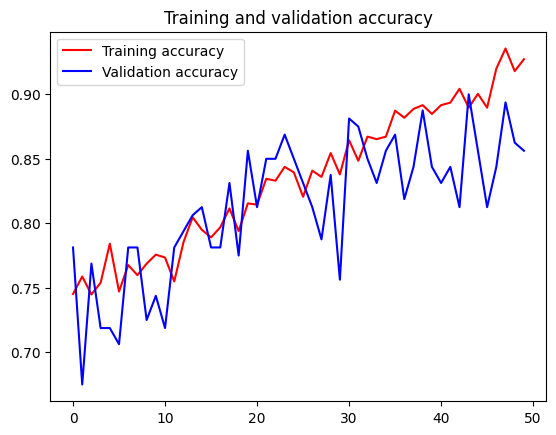

<Figure size 640x480 with 0 Axes>

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

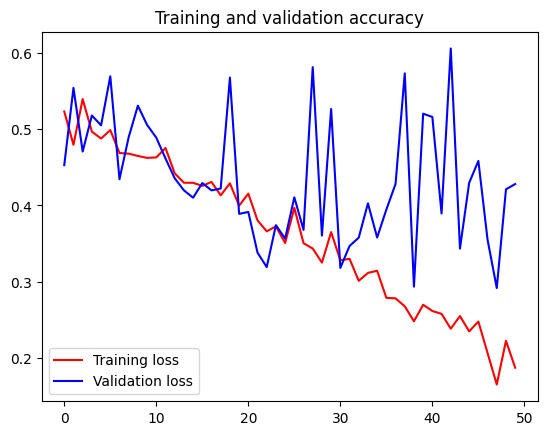

<Figure size 640x480 with 0 Axes>

In [38]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()